In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
filepath = '/content/drive/MyDrive/Colab Notebooks/dataset_LR.csv'

Mounted at /content/drive


In [3]:
data=pd.read_csv(filepath)  #read and print the dataset given
print(data)

        attr1     attr2    attr3    attr4  class
0     3.62160   8.66610  -2.8073 -0.44699      0
1     4.54590   8.16740  -2.4586 -1.46210      0
2     3.86600  -2.63830   1.9242  0.10645      0
3     3.45660   9.52280  -4.0112 -3.59440      0
4     0.32924  -4.45520   4.5718 -0.98880      0
...       ...       ...      ...      ...    ...
1367  0.40614   1.34920  -1.4501 -0.55949      1
1368 -1.38870  -4.87730   6.4774  0.34179      1
1369 -3.75030 -13.45860  17.5932 -2.77710      1
1370 -3.56370  -8.38270  12.3930 -1.28230      1
1371 -2.54190  -0.65804   2.6842  1.19520      1

[1372 rows x 5 columns]


In [4]:
shuffle = data.sample(frac=1)
train_size = int(0.7 * len(data))
train_set = shuffle[:train_size]
test_set = shuffle[train_size:]
X_train, Y_train = train_set.iloc[:train_size,0:-1],train_set.iloc[:train_size,-1]
X_test, Y_test = test_set.iloc[train_size:,0:-1],test_set.iloc[train_size:,-1]
m = len(Y_train)

In [5]:
def Normalization(X):
  mu = np.mean(X, axis=0 )
  sigma = np.std(X, axis = 0, ddof=1)
  X_Norm = (X - mu)/sigma
  return X_Norm, mu, sigma

In [6]:
X_train, mu, sigma = Normalization(X_train)
print(mu)
print(sigma)
X_train

attr1    0.425141
attr2    2.024042
attr3    1.387465
attr4   -1.185243
dtype: float64
attr1    2.873081
attr2    5.763446
attr3    4.234874
attr4    2.092570
dtype: float64


,attr1,attr2,attr3,attr4
460,0.188160,1.105061,-0.649007,-0.134121
41,-0.219744,1.248673,-1.202365,-2.688110
544,1.329812,-0.143307,-0.170285,1.018940
1292,-0.415262,0.249115,-1.140049,-1.071581
614,0.725270,0.835777,-0.334576,0.781031
...,...,...,...,...
1219,-1.393953,-0.271482,0.226272,0.347851
221,0.694188,0.770799,-0.506354,0.675362
1371,-1.032704,-0.465361,0.306204,1.137569
318,0.401924,-1.167989,1.542226,-0.173689


In [7]:
mu_test = np.mean(X_train, axis = 0)
mu_test

attr1   -1.045460e-16
attr2   -4.637494e-16
attr3   -2.713108e-16
attr4    9.471590e-17
dtype: float64

In [8]:
sigma_test = np.std(X_train, axis =0, ddof=1)
sigma_test

attr1    1.0
attr2    1.0
attr3    1.0
attr4    1.0
dtype: float64

In [9]:
def Cost( X, Y, theta):
  y_pred = X.dot(theta)
  error = np.subtract(y_pred, Y)
  sq_error = np.square(error)
  J = np.sum(sq_error)/(2*m)
  return J

In [10]:
def loss(h , y): 
    return ((-y * np.log(h) - (1 - y) * np.log(1 - h)).sum())/len(y)

def predict(theta, X):
  w = np.dot(X, theta)
  y_pred = 1/(1+np.exp(-w))
  binary_pred = [1 if i>0.5 else 0 for i in y_pred]
  return binary_pred

In [11]:
def Gradient_Descent(X, Y, theta, alpha, iterations):
  iter_no = 0
  los = []
  accuracy = []
  #cost_list = np.zeros(iterations)
  for i in range(iterations):
    w = np.dot(X, theta)
    y_pred = 1/(1+np.exp(-w)) 
    #error = np.subtract(y_pred, Y)
    delta_sum = np.dot(X.T , y_pred - Y)
    theta = theta - alpha*delta_sum

    binary_pred = [1 if i>0.5 else 0 for i in y_pred]
    #cost_list[i] = loss(binary_pred, Y)/4
    iter
    if i%50 == 0 :
      los.append(loss(y_pred, Y))     #appending loss
      accuracy.append(((binary_pred == Y).sum()/len(Y)))     #appending accuracy

  return theta, los, accuracy

In [12]:
theta = np.zeros(4)
iterations = 1000
alpha = 0.01

In [13]:
def evaluate(y_pred , y):
  k=0
  tp=0
  fp=0
  fn=0
  tn=0
  for x in y_pred :
    if x==1:
      if y[k] == 1:
        tp+=1
      else:
        fp+=1
    else:
      if y[k] == 1:
        fn+=1
      else:
        tn+=1
    k = k + 1
  return tp,fp,tn,fn

In [14]:
import random
def StochaisticGD( X, y, iterations, alpha, theta):
  los = []
  accuracy = []
  rows , features  = X.shape #rows x cols
  weights = np.zeros(features)    #initialising weights
  bias = 0    #initialising bias
  y = y.reshape((y.shape[0],))
  iter_no = 0
    
  #Stochastic Gradient descent
  for i in range(iterations):
         
        #chosing a random entry
    random_number = random.randint(0, len(y)-1)   
    x_b, y_b = X[random_number], y[random_number]

    w = np.dot(x_b, theta)    #weight vector
        
    y_pred = 1/(1+np.exp(-w))    #predicting class
        
        #calculating weight and bias errors
    delta_w = np.dot(x_b.T , y_pred - y_b)
        
        #updating weights and bias 
    theta = theta - alpha*(delta_w)
            
    binary_pred = predict(theta,X)    #classifying class 
            
    iter_no+=1
    #y_pred = y_pred.to_numpy()

    if iter_no%50==0:
      los.append(loss(y_pred, y))     #appending loss
      tp,fp,tn,fn = evaluate(binary_pred , y)   #calculating true/false positives/negatives
      accuracy.append((tp+tn)/(tp+tn+fp+fn))
  
  return theta, los, accuracy

In [23]:
Accuracy =[]
Accuracy_test =[]
AccuracySGD=[]
AccuracySGD_test=[]

Loss=[]
LossSGD =[]

Fscore = []
Fscore_test = []
FscoreSGD=[]
FscoreSGD_test=[]

Precision=[]
Precision_test=[]
PrecisionSGD =[]
PrecisionSGD_test =[]

Recall=[]
Recall_test=[]
RecallSGD=[]
RecallSGD_test=[]

theta_GD=[]
theta_SGD=[]

los =[]
losSGD =[]
for i in range(10):
  alpha = 0.001
  iterations = 10000
  theta = np.zeros(4)

  shuffle = data.sample(frac=1)
  data_train =  shuffle.head(train_size)
  data_test =  shuffle.tail(1372-train_size)

  X_train = data_train.iloc[: , 0:-1]
  Y_train = data_train.iloc[: ,-1]

  np_X_train = X_train.to_numpy()
  np_Y_train = Y_train.to_numpy()

  theta, los, accuracy =  Gradient_Descent(np_X_train, np_Y_train, theta, alpha, iterations )
  theta_GD.append(theta)

  theta_sgd = np.zeros(4)
  theta_sgd, losSGD, accuracySGD = StochaisticGD( np_X_train , np_Y_train , iterations, alpha, theta_sgd)
  theta_SGD.append(theta_sgd)

  print(" ")
  print("                                Shuffle number :",i)
  print("                                Gradient Descent")
    
  print("GD weights:",theta)
  print("Loss :",los[-1])
    
  print("                                 Training ")

  predicted = predict(theta,np_X_train)
  tp,fp,tn,fn = evaluate(predicted , np_Y_train)

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f_measure = 2*tp/(2*tp+fn+fp)
  accuracy= (tp+tn)/(tp+tn+fp+fn)

  print("Recall :",recall)
  print("Precision :",precision)
  print("F Measure :",f_measure)
  print("Accuracy : ",accuracy)

  Accuracy.append(accuracy)
  Loss.append(los[-1])
  Fscore.append(f_measure)
  Precision.append(precision)
  Recall.append(recall)

  print("                                 Testing ")
  X_test = data_test.iloc[: , 0:-1]
  Y_test = data_test.iloc[: ,-1]

  np_X_test = X_test.to_numpy()
  np_Y_test = Y_test.to_numpy()
  np_Y_test = np_Y_test.reshape((np_Y_test.shape[0],))

  #print(np_Y_test)
  #print(len(np_Y_test))

  predicted = predict(theta, np_X_test)
  #print(len(predicted))
  tp,fp,tn,fn = evaluate(predicted , np_Y_test)

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f_measure = 2*tp/(2*tp+fn+fp)
  accuracy= (tp+tn)/(tp+tn+fp+fn)

  print("Recall :",recall)
  print("Precision :",precision)
  print("F Measure :",f_measure)
  print("Accuracy : ",accuracy)

  Accuracy_test.append(accuracy)
  Fscore_test.append(f_measure)
  Precision_test.append(precision)
  Recall_test.append(recall)
  
  print(" ")
  print("                           Stochaistic Gradient Descent")
    
  print("SGD weights:",theta_sgd)
  print("Loss :",losSGD[-1])
    
  print("                                 Training ")

  predicted = predict(theta_sgd ,np_X_train)
  tp,fp,tn,fn = evaluate(predicted , np_Y_train)

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f_measure = 2*tp/(2*tp+fn+fp)
  accuracy= (tp+tn)/(tp+tn+fp+fn)

  print("Recall :",recall)
  print("Precision :",precision)
  print("F Measure :",f_measure)
  print("Accuracy : ",accuracy)

  AccuracySGD.append(accuracy)
  LossSGD.append(los[-1])
  FscoreSGD.append(f_measure)
  PrecisionSGD.append(precision)
  RecallSGD.append(recall)

  print("                                 Testing ")
  predicted = predict(theta_sgd, np_X_test)
  tp,fp,tn,fn = evaluate(predicted , np_Y_test)

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f_measure = 2*tp/(2*tp+fn+fp)
  accuracy= (tp+tn)/(tp+tn+fp+fn)

  print("Recall :",recall)
  print("Precision :",precision)
  print("F Measure :",f_measure)
  print("Accuracy : ",accuracy)

  AccuracySGD_test.append(accuracy)
  FscoreSGD_test.append(f_measure)
  PrecisionSGD_test.append(precision)
  RecallSGD_test.append(recall)

 
                                Shuffle number : 0
                                Gradient Descent
GD weights: [-2.88646907 -1.76312906 -1.90601653 -0.90754688]
Loss : 0.0956269600569355
                                 Training 
Recall : 0.9025522041763341
Precision : 1.0
F Measure : 0.948780487804878
Accuracy :  0.95625
                                 Testing 
Recall : 0.9050279329608939
Precision : 1.0
F Measure : 0.9501466275659824
Accuracy :  0.9587378640776699
 
                           Stochaistic Gradient Descent
SGD weights: [-1.21431099 -0.58868162 -0.62283333 -0.38399515]
Loss : 0.727049133018969
                                 Training 
Recall : 0.9025522041763341
Precision : 0.9923469387755102
F Measure : 0.945321992709599
Accuracy :  0.953125
                                 Testing 
Recall : 0.9050279329608939
Precision : 0.9818181818181818
F Measure : 0.9418604651162791
Accuracy :  0.9514563106796117
 
                                Shuffle number : 1
          

In [24]:
len(Loss)
Loss
len(los)

200

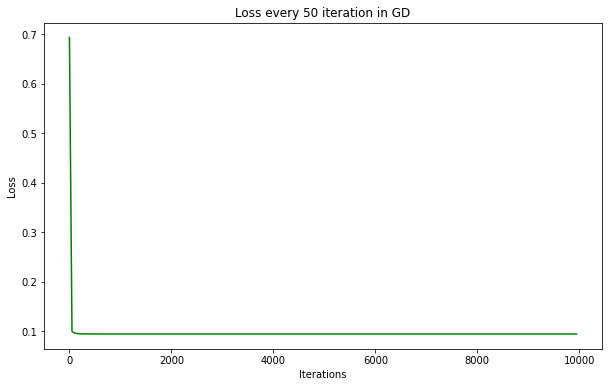

In [28]:
iter = []
for i in range(len(los)):
  iter.append(i*50)
plt.plot(iter,los,label="Gradient Descent",color='green')
plt.title("Loss every 50 iteration in GD")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

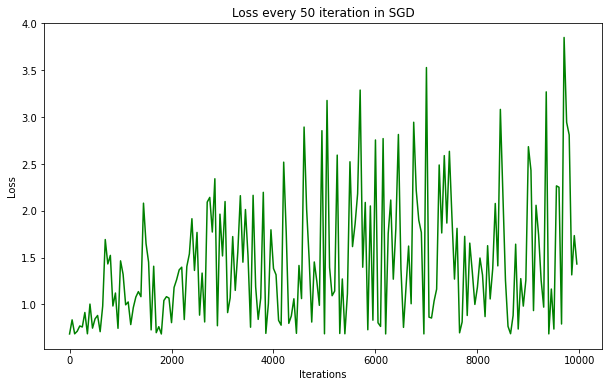

In [29]:
plt.plot(iter,losSGD,label="Stochaistic Gradient Descent",color='green')
plt.title("Loss every 50 iteration in SGD")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

Text(0.5, 1.0, 'Loss Gradient Descent at the end of each Shuffle')

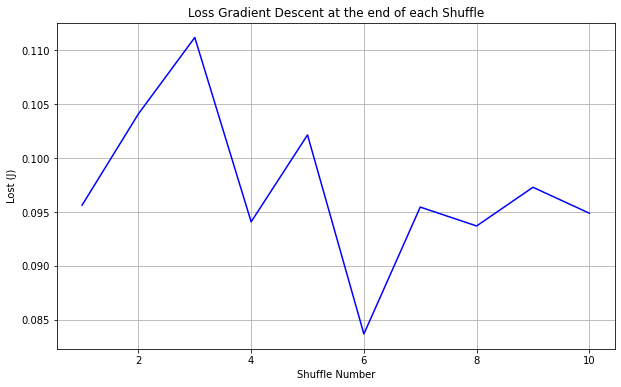

In [25]:
plt.plot(range(1,11), Loss, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Shuffle Number")
plt.ylabel("Lost (J)")
plt.title("Loss Gradient Descent at the end of each Shuffle")

Text(0.5, 1.0, 'Loss Stochaistic Gradient Descent at the end of each Shuffle')

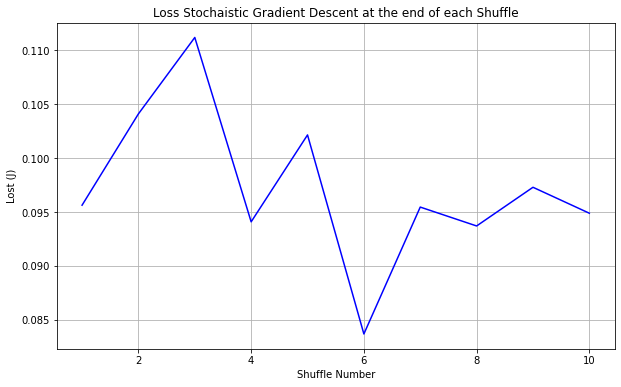

In [30]:
plt.plot(range(1,11), LossSGD, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Shuffle Number")
plt.ylabel("Lost (J)")
plt.title("Loss Stochaistic Gradient Descent at the end of each Shuffle")

In [19]:
theta_final_gd = [0,0,0,0]
for i in range(10):
  theta_final_gd += theta_GD[i]

theta_final_gd /= 10
print(theta_final_gd)

[-2.73311891 -1.67301387 -1.77893631 -0.85953219]


In [20]:
theta_final_sgd = [0,0,0,0]
for i in range(10):
  theta_final_sgd += theta_SGD[i]

theta_final_sgd /= 10
print(theta_final_sgd)

[-1.20375103 -0.61629768 -0.61139071 -0.35792794]


In [21]:
print("                                 Average values")

print(" ")
print("                                 Gradient Decent")
print(" ")

print("GD weights: ",theta_final_gd)
print("Loss :",np.mean(Loss))
print(" ")

print("                   Training GD")
print("Accuracy :" ,np.mean(Accuracy))
print("Precision :",np.mean(Precision))
print("Recall :",np.mean(Recall))
print("F score :",np.mean(Fscore))

print(" ")
print("                    Testing GD")
print("Accuracy :" ,np.mean(Accuracy_test))
print("Precision :",np.mean(Precision_test))
print("Recall :",np.mean(Recall_test))
print("F score :",np.mean(Fscore_test))

print(" ")
print("                               Stochastic Gradient Decent")
print(" ")

print("SGD weights: ",theta_final_sgd)
print("Loss :",np.mean(LossSGD))
print(" ")

print("                 Training SGD ")
print("Accuracy :" ,np.mean(AccuracySGD))
print("Precision :",np.mean(PrecisionSGD))
print("Recall :",np.mean(RecallSGD))
print("F score :",np.mean(FscoreSGD))

print(" ")
print("                  Testing SGD  ")
print("Accuracy :" ,np.mean(AccuracySGD_test))
print("Precision :",np.mean(PrecisionSGD_test))
print("Recall :",np.mean(RecallSGD_test))
print("F score :",np.mean(FscoreSGD_test))

                                 Average values
 
                                 Gradient Decent
 
GD weights:  [-2.73311891 -1.67301387 -1.77893631 -0.85953219]
Loss : 0.09668506495796098
 
                   Training GD
Accuracy : 0.9598958333333334
Precision : 1.0
Recall : 0.9104485700611674
F score : 0.9531136825467023
 
                    Testing GD
Accuracy : 0.9548543689320388
Precision : 0.998076923076923
Recall : 0.898121913989349
F score : 0.9453795835092356
 
                               Stochastic Gradient Decent
 
SGD weights:  [-1.20375103 -0.61629768 -0.61139071 -0.35792794]
Loss : 0.09668506495796098
 
                 Training SGD 
Accuracy : 0.9550000000000001
Precision : 0.9957292861176089
Recall : 0.9034389985864039
F score : 0.947314560585564
 
                  Testing SGD  
Accuracy : 0.9492718446601943
Precision : 0.9904934451633685
Recall : 0.8918730432199974
F score : 0.9385264286504729


For Learning Rate : 0.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


Final GD weights:  [-96.83890767 -63.93968538 -72.54552188 -40.39984656]
GD accuracy:  0.940625


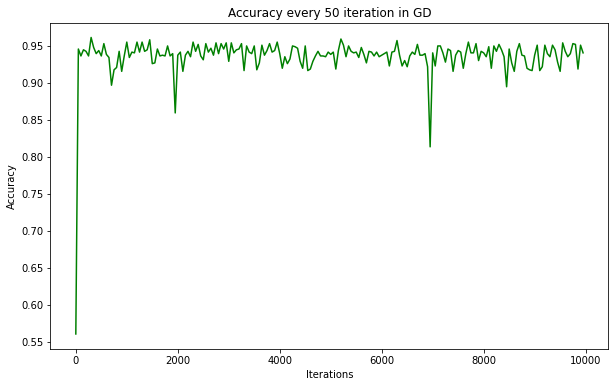

Final SGD weights:  [-3.73410368 -2.69514979 -2.63459805 -2.00922761]
SGD accuracy:  0.9552083333333333


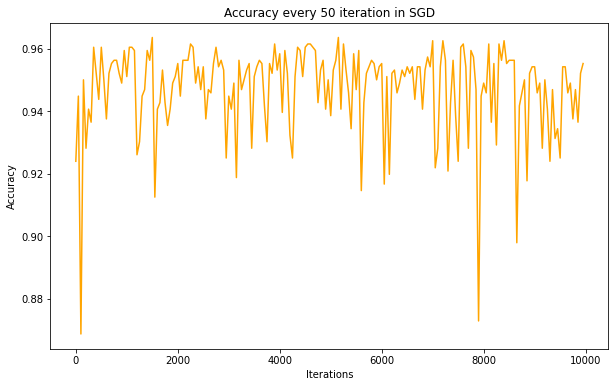

For Learning Rate : 0.01
Final GD weights:  [-9.61680769 -6.11604531 -7.1393194  -4.1191016 ]
GD accuracy:  0.9447916666666667


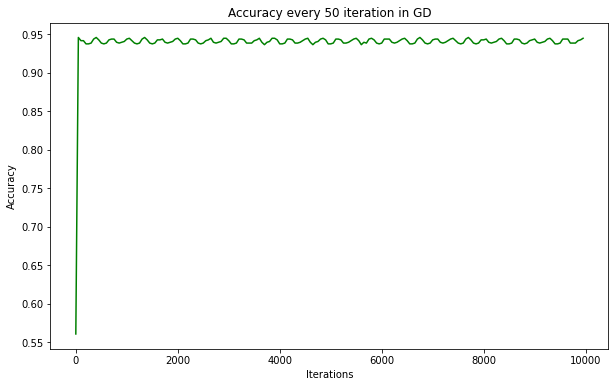

Final SGD weights:  [-2.38288399 -1.34388971 -1.4514291  -0.69270643]
SGD accuracy:  0.9625


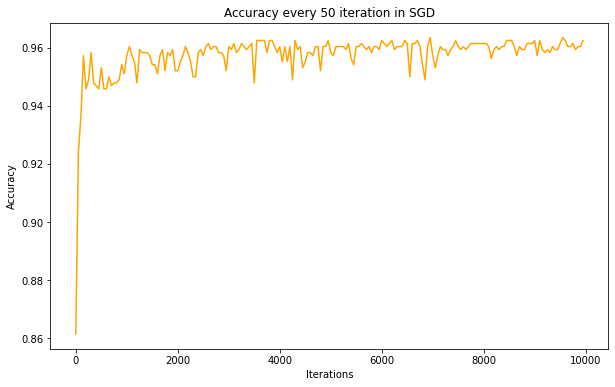

For Learning Rate : 0.0001
Final GD weights:  [-2.90410534 -1.79543575 -1.88888732 -0.87460674]
GD accuracy:  0.9614583333333333


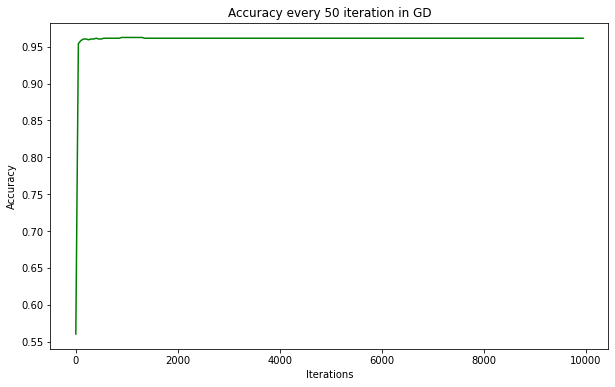

Final SGD weights:  [-0.47650424 -0.24800511 -0.18085466 -0.09949814]
SGD accuracy:  0.9375


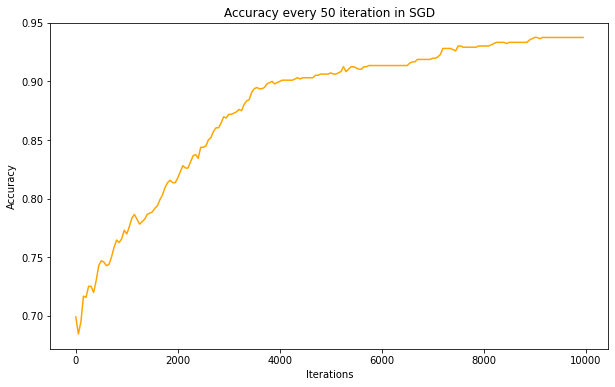

In [22]:
LearningRates = [0.1, 0.01,0.0001]

shuffle = data.sample(frac=1)
data_train =  shuffle.head(train_size)
data_test =  shuffle.tail(1372-train_size)

X_train = data_train.iloc[: , 0:-1]
Y_train = data_train.iloc[: ,-1]

np_X_train = X_train.to_numpy()
np_Y_train = Y_train.to_numpy()

for alpha in LearningRates:
  print("For Learning Rate :", alpha)
  iterations = 10000
  theta = np.zeros(4)

  theta, los, accuracy =  Gradient_Descent(np_X_train, np_Y_train, theta, alpha, iterations )

  theta_sgd = np.zeros(4)
  theta_sgd, losSGD, accuracySGD = StochaisticGD( np_X_train , np_Y_train , iterations, alpha, theta_sgd)

  iter = []
  for i in range(len(los)):
    iter.append(i*50)

  print("Final GD weights: ",theta)
  print("GD accuracy: ",(accuracy[-1]))
  plt.plot(iter,accuracy,label="Gradient Descent",color='green')
  plt.title("Accuracy every 50 iteration in GD")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.show()

  print("Final SGD weights: ",theta_sgd)
  print("SGD accuracy: ",(accuracySGD[-1]))
  plt.plot(iter,accuracySGD,label="Stochaistic Gradient Descent",color='orange')
  plt.title("Accuracy every 50 iteration in SGD")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.show()